In [11]:
import numpy as np
import pandas as pd
#모델 라이브러리 선언
from sklearn import datasets, tree
#모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# CSV파일을 읽어 DataFrame 변수에 저장하기
featuresData = pd.read_csv("../dataset./feature_regression_example.csv")

In [12]:
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442


In [7]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [13]:
featuresData.PROMOTION.unique()

array(['Y', 'N'], dtype=object)

In [14]:
featuresData["PRO_YN"] = np.where(featuresData.PROMOTION == "Y",1,0)
featuresData["HO_YN"] = np.where(featuresData.HOLIDAY == "Y",1,0)

In [11]:
featuresData.head(3)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0


### 1. pd.get_dummies

In [15]:
pd.concat([featuresData, pd.get_dummies(data = featuresData.PROMOTION, prefix = "PROMO")],axis = 1).head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN,PROMO_N,PROMO_Y
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1,0,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0,0,1


In [16]:
featuresData.head(3)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0


### 2. label encoder

In [17]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le_pro = LabelEncoder()

In [20]:
featuresData["ENCO_PRO"] = le_pro.fit_transform(featuresData.PROMOTION)

In [24]:
featuresData.head(3)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN,ENCO_PRO
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0,1


In [21]:
le_pro.inverse_transform(featuresData.ENCO_PRO)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N'], dtype=object)

In [22]:
featuresData["INV_PRO"] = le_pro.inverse_transform(featuresData.ENCO_PRO)

In [23]:
featuresData[featuresData.PROMOTION != featuresData.INV_PRO]

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN,ENCO_PRO,INV_PRO


### 3. Dictionary

In [24]:
promoDict = { "Y" : 1,
              "N" : 0 }

In [25]:
featuresData["DICT_PRO"] = featuresData.PROMOTION.map(promoDict)

In [30]:
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN,ENCO_PRO,INV_PRO,DICT_PRO
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1,1,Y,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0,1,Y,1


In [26]:
cleansedData = featuresData[ (featuresData.YEARWEEK >= 201501) & (featuresData.YEARWEEK <= 201652) ]

In [27]:
cleansedData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN,ENCO_PRO,INV_PRO,DICT_PRO
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1,1,Y,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0,1,Y,1


In [28]:
corrdf = cleansedData.corr()

In [29]:
corrStd  = 0.5

In [30]:
corrdf[(abs(corrdf["QTY"]) > corrStd) &(corrdf["QTY"] < 1)]

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,PRO_YN,HO_YN,ENCO_PRO,DICT_PRO
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.374072,-0.974601,-0.374072,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.898554,0.487062,0.898554,0.898554
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,1.000000,0.365148,1.000000,1.000000
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,0.365148,1.000000,0.365148,0.365148
ENCO_PRO,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,1.000000,0.365148,1.000000,1.000000
DICT_PRO,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,1.000000,0.365148,1.000000,1.000000


In [31]:
features = list(corrdf[(abs(corrdf["QTY"]) > corrStd) &(corrdf["QTY"] < 1)].index)

In [32]:
label = ["QTY"]

In [33]:
yearweekStd = 201630

In [62]:
indexStd = round(len(featuresData)*0.8)

In [66]:
yearweekStd = featuresData.loc[indexStd]["YEARWEEK"]

In [34]:
trainingData_features = featuresData[ featuresData.YEARWEEK <= yearweekStd ][features]
trainingData_label = featuresData[ featuresData.YEARWEEK <= yearweekStd ][label]
testData_features = featuresData[ featuresData.YEARWEEK > yearweekStd ][features]
testData_label = featuresData[ featuresData.YEARWEEK > yearweekStd ][label]

testData_all = featuresData[ featuresData.YEARWEEK > yearweekStd ]

In [68]:
trainingData_features.head(3)

,HCLUS,PRO_PERCENT,PRO_YN,HO_YN,ENCO_PRO,DICT_PRO
0,1,0.209442,1,1,1,1
1,4,0.209442,1,0,1,1
2,4,0.208155,1,0,1,1


In [35]:
print(trainingData_features.shape)
print(trainingData_label.shape)
print(testData_features.shape)
print(testData_label.shape)

(83, 6)
(83, 1)
(24, 6)
(24, 1)


In [36]:
from sklearn import tree

In [ ]:
tree.DecisionTreeRegressor

In [37]:
from sklearn import linear_model

In [74]:
linear_model.LinearRegressionr

AttributeError: module 'sklearn.linear_model' has no attribute 'LinearRegressionr'

In [38]:
from sklearn import ensemble

In [ ]:
ensemble.RandomForestRegressor

In [39]:
# Define Model
model_method = tree.DecisionTreeRegressor(random_state =1)
# Learning (Feature & Label)
model =model_method.fit (trainingData_features ,trainingData_label)

In [40]:
#예측
predict = model.predict(testData_features)
predict

array([1606.5       , 1606.5       ,  350.71428571, 1434.6       ,
       1434.6       , 1434.6       , 1434.6       , 1434.6       ,
       1606.5       , 1606.5       , 2620.42857143, 1606.5       ,
        350.71428571, 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       ,  350.71428571,  350.71428571])

In [41]:
predictDf = pd.DataFrame(predict, columns = ["PREDICT"])

In [42]:
testData_all = testData_all.reset_index(drop=True)

In [43]:
finalResult = pd.concat( [testData_all,predictDf], axis=1)

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
### MAE
mean_absolute_error(finalResult["QTY"], finalResult["PREDICT"])

450.3327380952381

In [46]:
### RMSE (MSE)
np.sqrt(mean_squared_error(finalResult["QTY"], finalResult["PREDICT"]))


586.3704777283391

In [47]:
### R2
r2_score(finalResult["QTY"], finalResult["PREDICT"])

0.43963558102078526

In [114]:
finalResult.to_csv("./dt_result.csv")

In [51]:
testData_all = finalResult

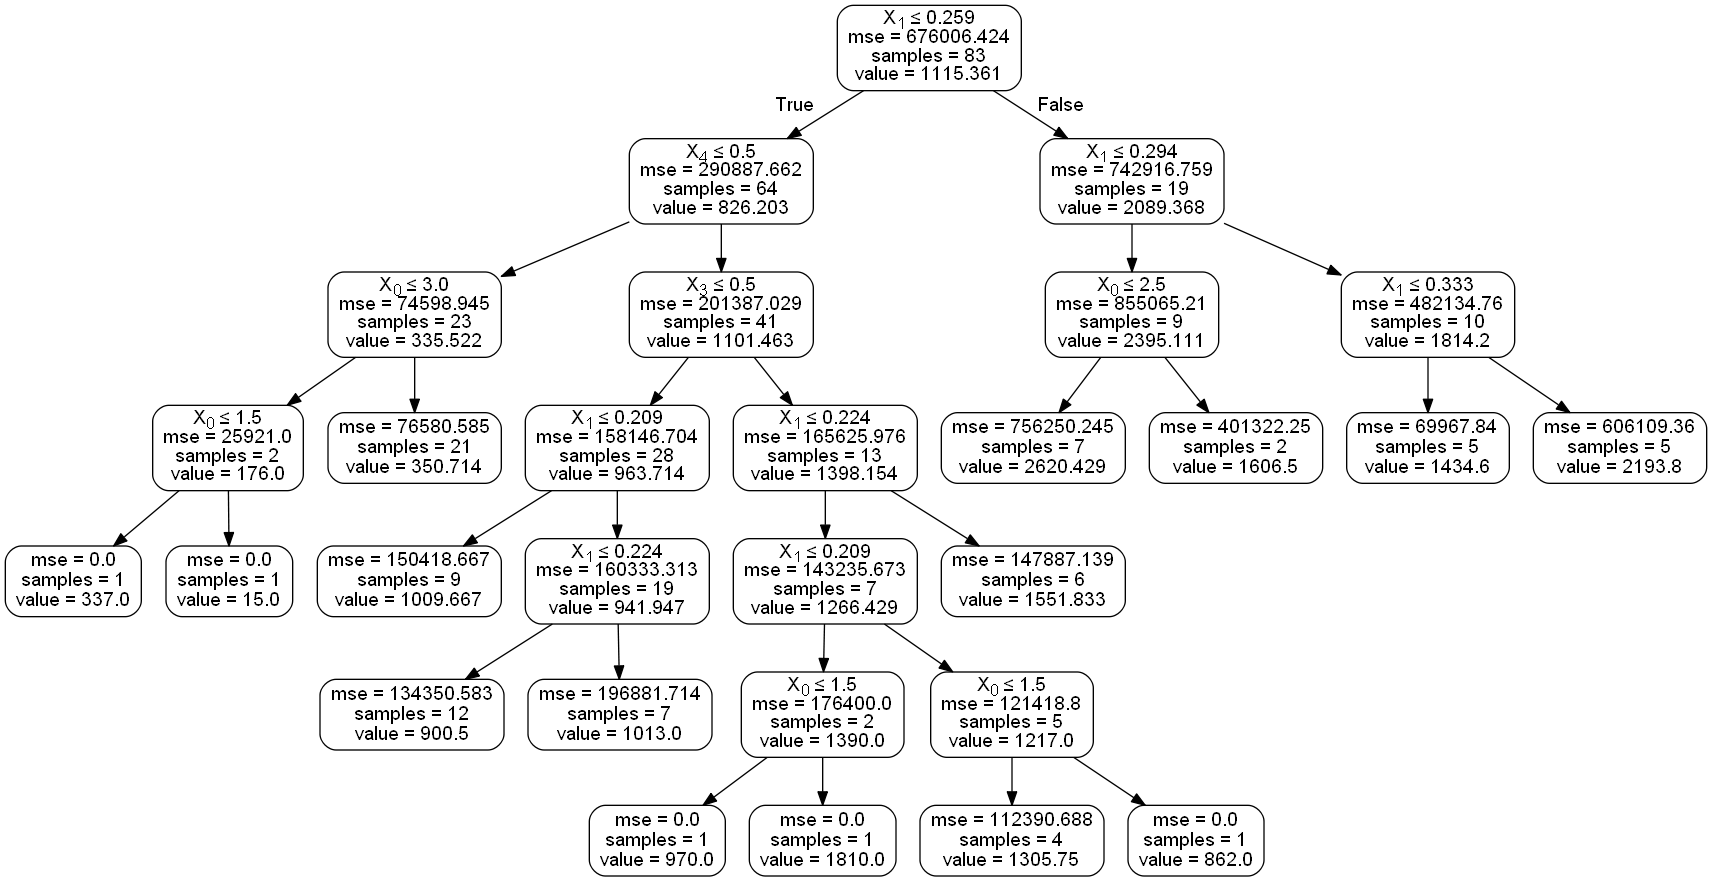

In [48]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [49]:
features

['HCLUS', 'PRO_PERCENT', 'PRO_YN', 'HO_YN', 'ENCO_PRO', 'DICT_PRO']

In [50]:
trainingData_features[trainingData_features.PRO_PERCENT <= 0.259]

,HCLUS,PRO_PERCENT,PRO_YN,HO_YN,ENCO_PRO,DICT_PRO
0,1,0.209442,1,1,1,1
1,4,0.209442,1,0,1,1
2,4,0.208155,1,0,1,1
3,2,0.208155,1,1,1,1
4,4,0.208155,1,0,1,1
5,4,0.208155,1,0,1,1
6,4,0.208155,1,0,1,1
7,1,0.208155,1,1,1,1
8,4,0.208155,1,0,1,1
9,4,0.000000,0,0,0,0


In [56]:
# Define Model
model_method_lr = linear_model.LinearRegression()
# Learning (Feature & Label)
model_lr =model_method_lr.fit (trainingData_features ,trainingData_label)

In [58]:
#예측
predict_lr = model_lr.predict(testData_features)


In [72]:
predictDf_lr = pd.DataFrame(predict_lr, columns = ["PREDICT_LR"])
testData_all_lr = testData_all.reset_index(drop=True)
finalResult_lr = pd.concat( [testData_all_lr,predictDf_lr], axis=1)

In [73]:
finalResult_lr.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN,ENCO_PRO,INV_PRO,DICT_PRO,PREDICT,PREDICT_LR
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,1,0,1,Y,1,1606.5,1411.291719
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,1,0,1,Y,1,1606.5,1411.291719


In [64]:
# Define Model
model_method_rf = ensemble.RandomForestRegressor(random_state =1)
# Learning (Feature & Label)
model_rf =model_method_rf.fit (trainingData_features ,trainingData_label)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [65]:
#예측
predict_rf = model_rf.predict(testData_features)

In [74]:
predictDf_rf = pd.DataFrame(predict_rf, columns = ["PREDICT_RF"])
testData_all_rf = testData_all.reset_index(drop=True)
finalResult_rf = pd.concat( [testData_all_rf,predictDf_rf], axis=1)

In [75]:
finalResult_rf.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN,ENCO_PRO,INV_PRO,DICT_PRO,PREDICT,PREDICT_RF
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,1,0,1,Y,1,1606.5,1610.691667
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,1,0,1,Y,1,1606.5,1610.691667


In [78]:
totalResultDf = pd.concat( [testData_all,predictDf_lr,predictDf_rf], axis=1)

In [80]:
totalResultDf.rename(columns={"PREDICT":"PREDICT_DT"}, inplace = True)

In [82]:
totalResultDf.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN,ENCO_PRO,INV_PRO,DICT_PRO,PREDICT_DT,PREDICT_LR,PREDICT_RF
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,1,0,1,Y,1,1606.5,1411.291719,1610.691667
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,1,0,1,Y,1,1606.5,1411.291719,1610.691667
